# Численное решение ОДУ

## Решение нелинейной краевой задачи

Написать программу для численного решения краевой задачи:
$$ u^{\prime \prime}(x) = u(2x^{2} - 2\ln{u} - 2), \; u(0) = 1, \; u(1) = 1 / e $$
с помощью конечно-разностного метода $2$-го порядка. 

1. Программа должна содержать функцию, которая принимает на вход количество узлов и порог точности для остановки итераций в методе Ньютона, и возвращает массив значений решения в узлах сетки и координаты узлов сетки.
2. Функция должна решать нелинейную систему уравнений, полученную после конечно-разностной аппроксимации исходной задачи, методом Ньютона.
3. Для решения линейной системы на каждой итерации нужно использовать либо готовую, либо собственную функцию для решения трехдиагональной системы.
4. Программа должна запускать расчет для сгущающихся равномерных сеток (шаг уменьшается вдвое), и строить в логарифмической шкале график зависимости ошибки от величины шага. За условно точное решение нужно взять численное решение на очень подробной сетке. График должен показывать, что порядок аппроксимации равен 2.
5. Программа должна выводить графики численного и точного решения для тестовой задачи.

## Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_jacobian_matrix(size, step, xs, u):
    return (1 / step ** 2) * (-2 * np.eye(size) - step ** 2 * np.diag(2 * xs ** 2 - 2 * np.log(u)) 
            + np.diag(np.ones(size - 1), k = - 1) + np.diag(np.ones(size - 1), k = 1))

In [3]:
def make_rhs(size, step, u, xs, left_value, right_value):
    rhs = np.zeros(size)
    
    rhs[0] = (1 / step ** 2) * (left_value - 2 * u[0] + u[1]) - 2 * xs[0] ** 2 * u[0] + 2 * u[0] * np.log(u[0]) + 2 * u[0]
    
    rhs[size - 1] = (1 / step ** 2) * (u[size - 2] - 2 * u[size - 1] + right_value) - 2 * xs[size - 1] ** 2 * u[size - 1] + 2 * u[size - 1] * np.log(u[size - 1]) + 2 * u[size - 1]
    
    for j in range(1, size - 1):
        rhs[j] = (1 / step ** 2) * (u[j - 1] - 2 * u[j] + u[j + 1]) - 2 * xs[j] ** 2 * u[j] + 2 * u[j] * np.log(u[j]) + 2 * u[j]
        
    return -rhs

In [4]:
def solution(num_nodes, accuracy = 1e-8, left_bound = 0., right_bound = 1., left_value = 1, right_value = 1 / np.exp(1.)):
    step = (right_bound - left_bound) / (num_nodes + 1)
    xs = np.array([step * j for j in range(1, num_nodes + 1)])
    u = np.zeros(num_nodes) + 1
    dist = np.inf
    
    while dist > accuracy:
        J = make_jacobian_matrix(num_nodes, step, xs, u)
        rhs = make_rhs(num_nodes, step, u, xs, left_value, right_value)
        
        delta_u = np.linalg.solve(J, rhs)
        dist = np.linalg.norm(delta_u)
        u += delta_u
        
    return xs, u

In [5]:
def make_plot(current_xs, current_solution, exact_xs, exact_solution):
    plt.figure(figsize = (12, 7))
    plt.plot(current_xs, current_solution, marker = 'o', linestyle = 'none', markersize = 8, alpha = 0.7, color = 'c', label = 'Current nodes')
    plt.plot(exact_xs, exact_solution, alpha = 0.8, color = 'r', label = 'Exact solution')
    plt.title('Exact solution and solution with {} nodes'.format(current_xs.shape[0]), fontsize = 16)
    plt.xlabel('$x$', fontsize = 14)
    plt.ylabel('$f\:(x)$', fontsize = 14)
    plt.legend(fontsize = 12)
    plt.grid()
    plt.show()

In [6]:
exact_xs, exact_solution = solution(4095)
dict_x_values = dict(zip(exact_xs, exact_solution))

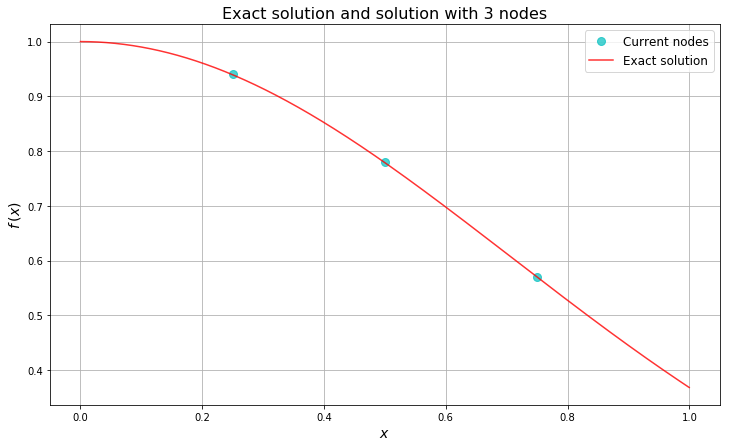

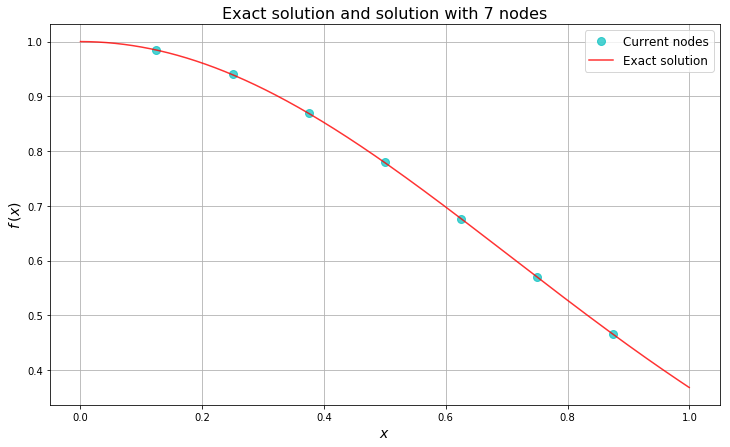

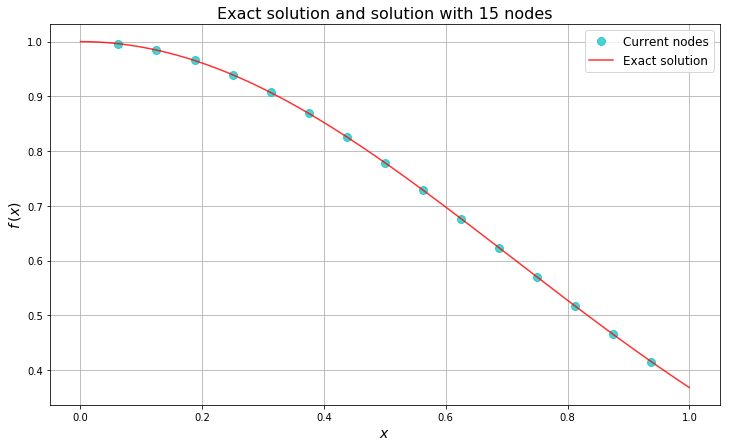

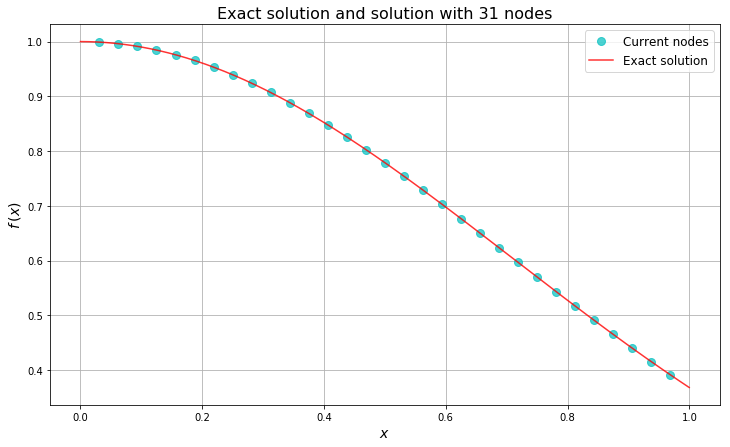

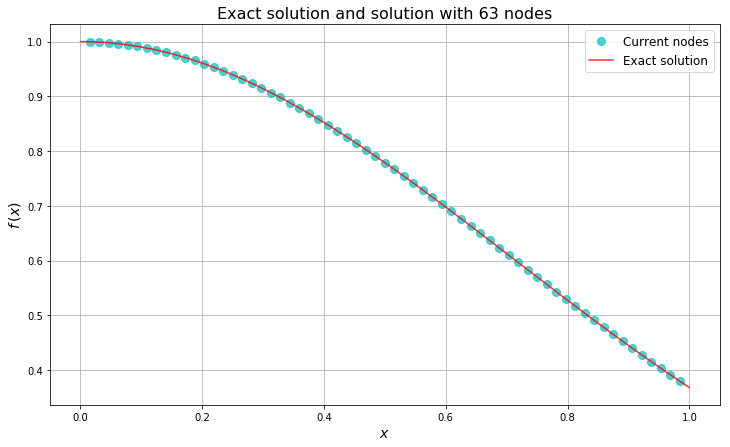

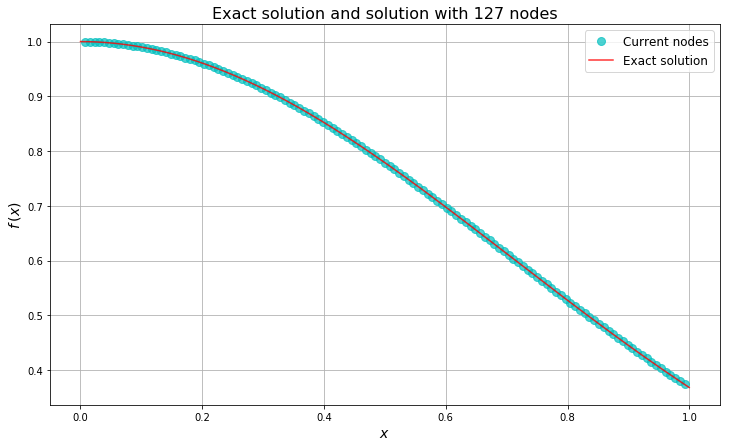

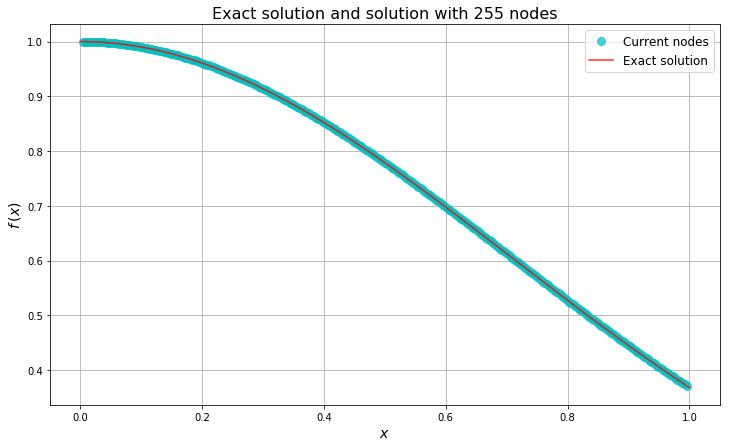

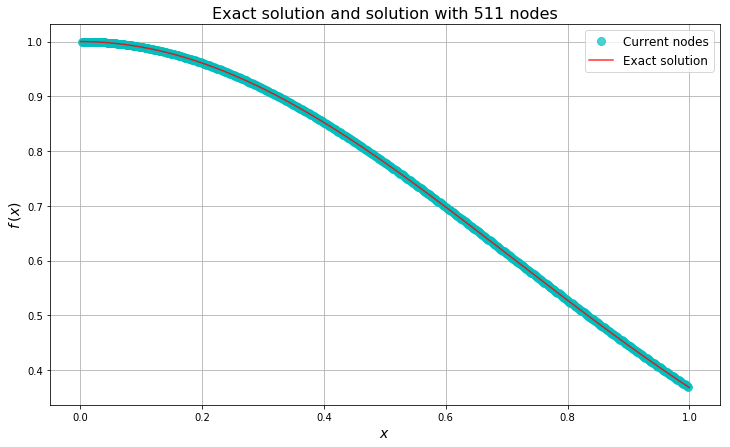

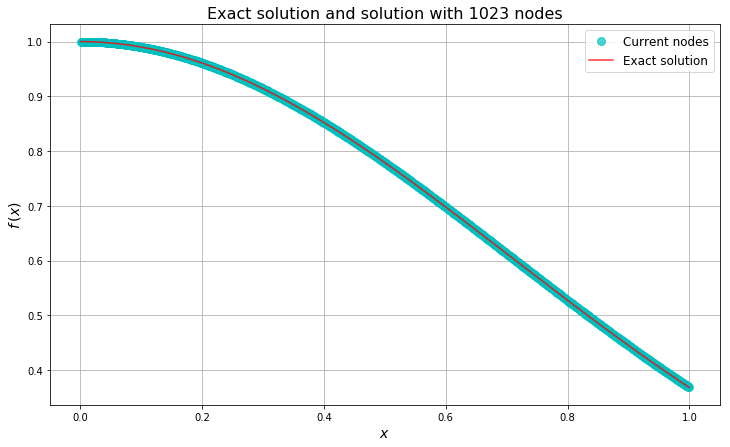

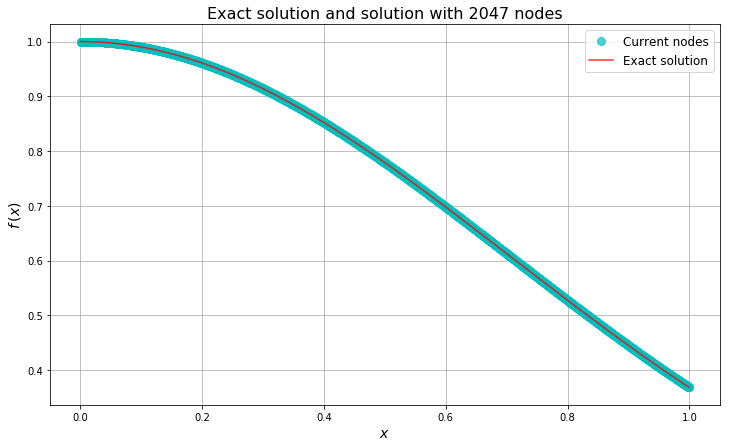

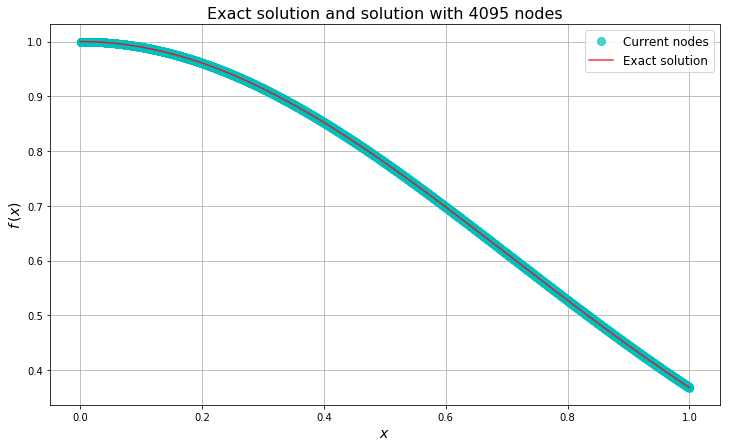

CPU times: user 1min 11s, sys: 8.7 s, total: 1min 20s
Wall time: 20.8 s


In [7]:
%%time
nodes = np.array([2 ** i - 1 for i in range(2, 13)])
steps = 1. / (nodes + 1)
errors = np.array([])

for i in nodes:
    current_xs, current_solution = solution(i)
    
    f_exact = np.array([])
    for j in range(i):
        f_exact = np.append(f_exact, dict_x_values[current_xs[j]])
    errors = np.append(errors, np.linalg.norm(f_exact - current_solution))
    
    make_plot(current_xs, current_solution, exact_xs, exact_solution)

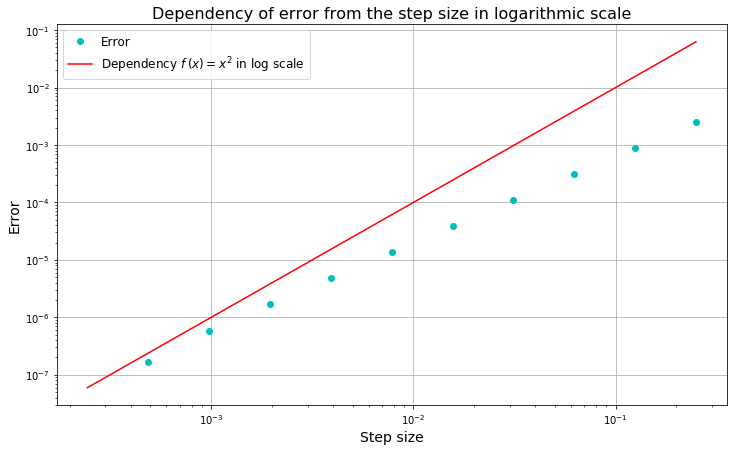

In [8]:
plt.figure(figsize = (12, 7))
plt.loglog(steps, errors, marker = 'o', linestyle = 'none', color = 'c', label = 'Error')
plt.loglog(steps, steps ** 2, color = 'r', label = 'Dependency $f\:(x) = x^{2}$ in log scale')
plt.title('Dependency of error from the step size in logarithmic scale', fontsize = 16)
plt.xlabel('Step size', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.grid()
plt.legend(fontsize = 12)
plt.show()